## PROBLEM:

## For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## Data set for the Problem: Sparkling.csv and Rose.csv

In [261]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
# advanced visualization
import seaborn as sns 
%matplotlib inline

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data.

In [262]:
sparkling_df=pd.read_csv("sparkling.csv")
print('\n',sparkling_df.head())


   YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


In [263]:
sparkling_df=pd.read_csv("sparkling.csv", parse_dates=True, index_col='YearMonth')
sparkling_df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [264]:
display(sparkling_df.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

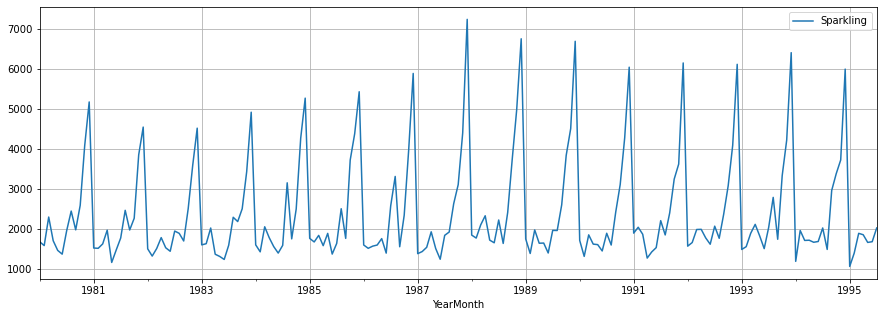

In [265]:
sparkling_df.plot(figsize=(15,5), grid=True)

In [266]:
rose_df=pd.read_csv("Rose.csv", parse_dates=True, index_col='YearMonth')
rose_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [267]:
display(rose_df.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

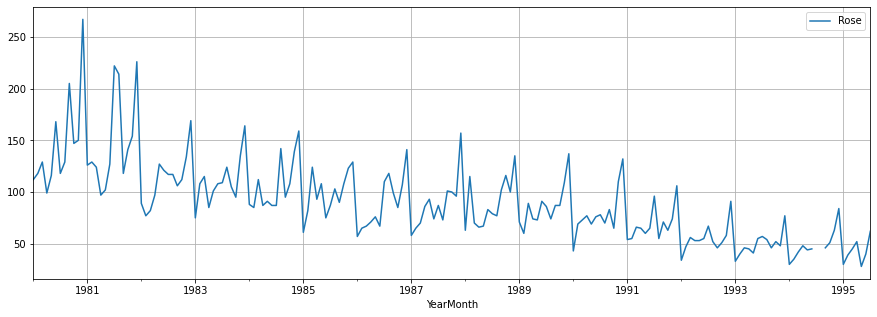

In [268]:
rose_df.plot(figsize=(15,5), grid=True)

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [269]:
sparkling_df.info()
print('\n')
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [270]:
print(sparkling_df.shape)
print(rose_df.shape)

(187, 1)
(187, 1)


In [271]:
#summary
print("Sparkling:")
display(round(sparkling_df.describe(),3))
print("\nRose:")
display(round(rose_df.describe(),3))

Sparkling:


,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000



Rose:


,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [272]:
#missing values 
display(sparkling_df.isna().sum())
display(rose_df.isna().sum())

rose_df.fillna(method = 'bfill', inplace=True)

display(rose_df.isna().sum())
rose_df.shape

Sparkling    0
dtype: int64

Rose    2
dtype: int64

Rose    0
dtype: int64

(187, 1)

In [273]:
sparkling_df1 = sparkling_df.copy()
sparkling_df1['Year'] = sparkling_df1.index.year
sparkling_df1['Month'] = sparkling_df1.index.month
display(sparkling_df1.head())

rose_df1 = rose_df.copy()
rose_df1['Year'] = rose_df1.index.year
rose_df1['Month'] = rose_df1.index.month
display(rose_df1.head())

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


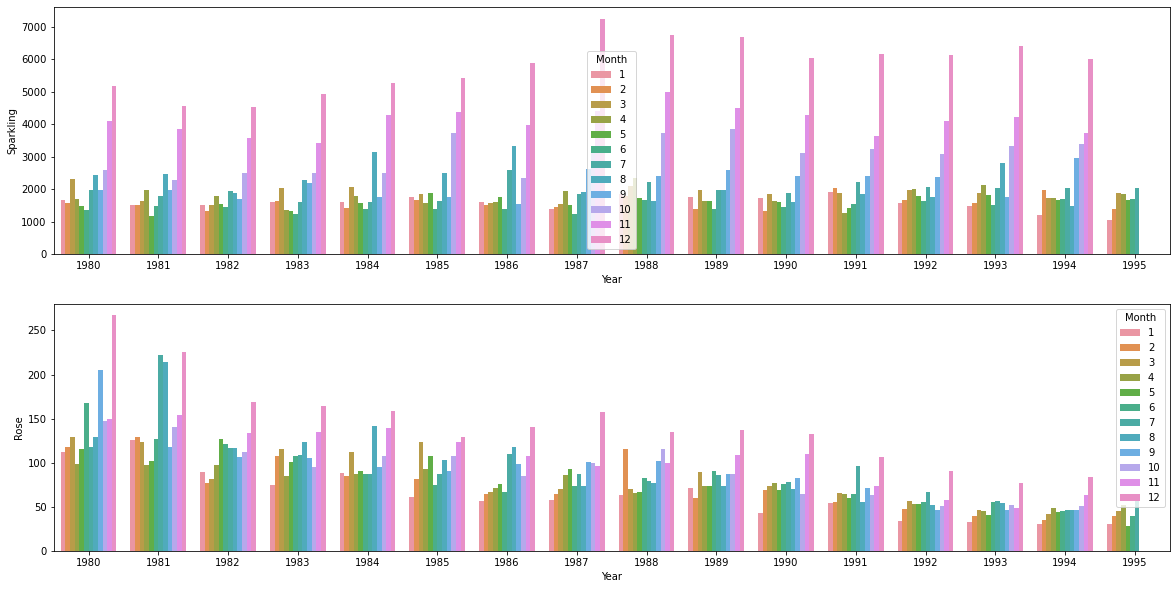

In [274]:
plt.figure(figsize=(20, 10))
ax1= plt.subplot(2,1,1)
sns.barplot(x = sparkling_df1['Year'], y = sparkling_df1['Sparkling'], hue= sparkling_df1['Month'], ax= ax1, )
ax2= plt.subplot(2,1,2)
sns.barplot(x = rose_df1['Year'], y = rose_df1['Rose'], hue= rose_df1['Month'], ax=ax2)
plt.show()

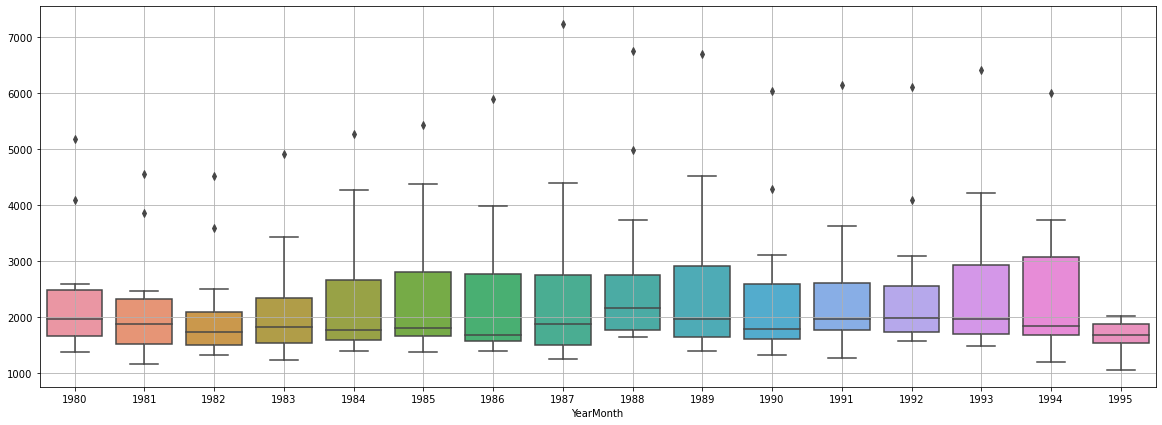

In [275]:
# Yearly box blot
_, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = sparkling_df1.index.year,y = sparkling_df1.values[:,0],ax=ax)
plt.grid();

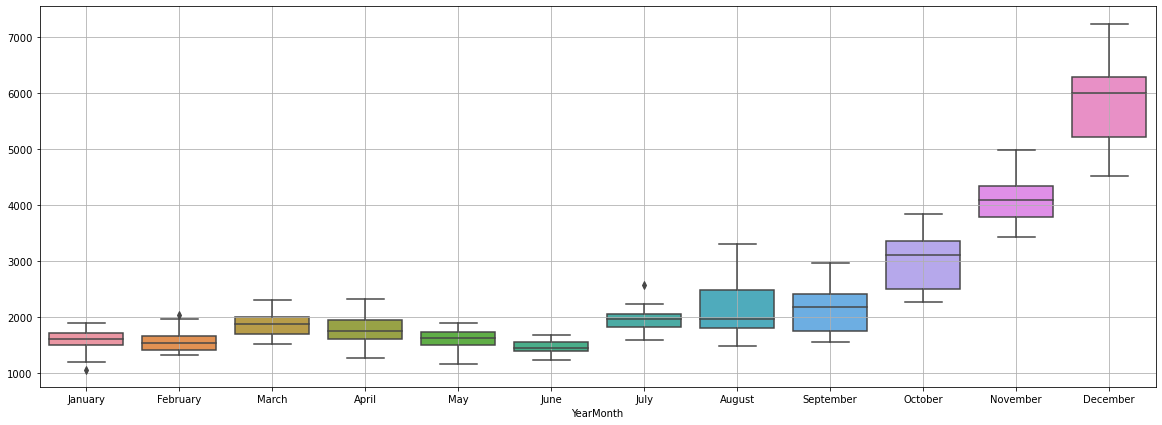

In [276]:
#Monthly box plot 1
_, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = sparkling_df1.index.month_name(),y = sparkling_df1.values[:,0],ax=ax)
plt.grid();

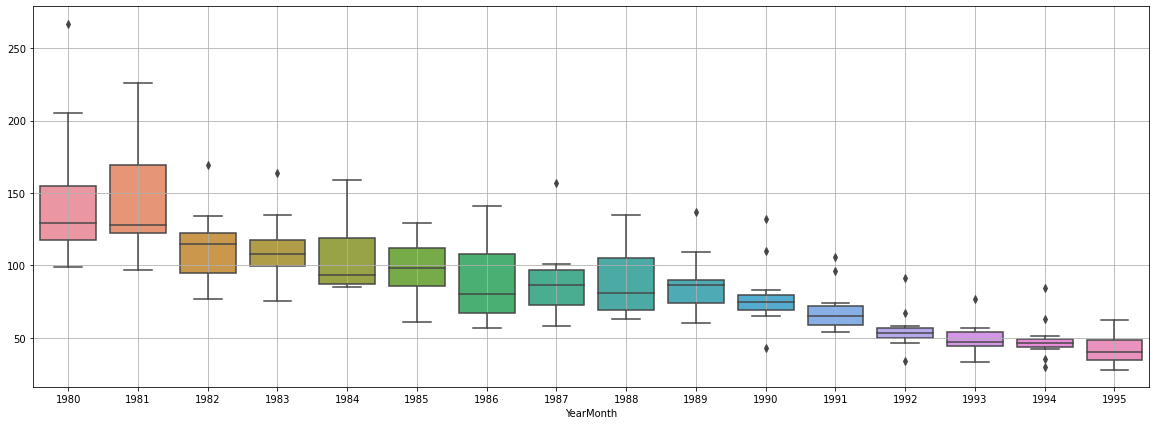

In [277]:
# Yearly box blot
_, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = rose_df1.index.year,y = rose_df1.values[:,0],ax=ax)
plt.grid();

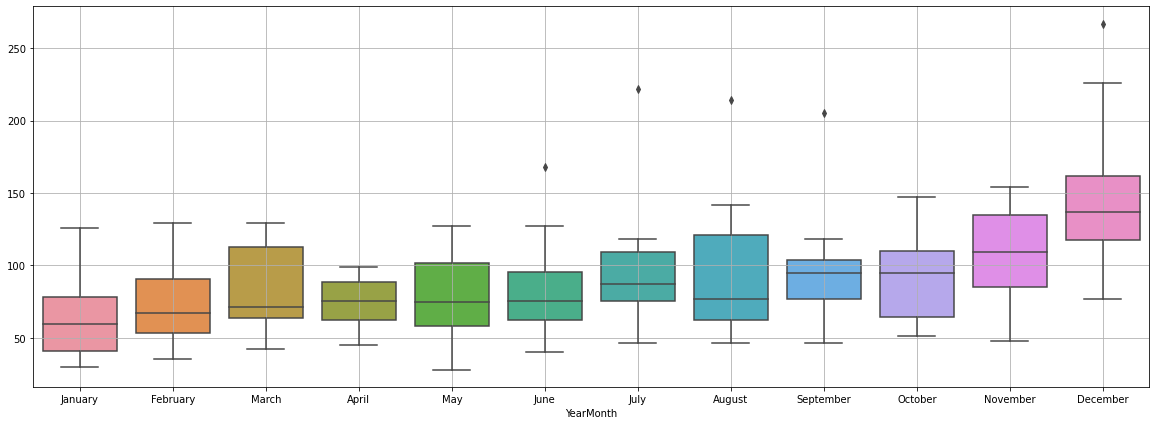

In [278]:
#Monthly box plot 1
_, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = rose_df1.index.month_name(),y = rose_df1.values[:,0],ax=ax)
plt.grid();

# Decomposition

Additive decomposition of Sparkling & Rose data

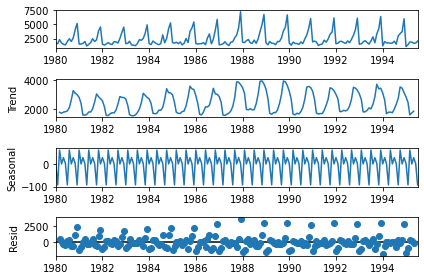

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01    1752.8
1980-04-01    1691.0
1980-05-01    1766.0
1980-06-01    1795.8
1980-07-01    1850.2
1980-08-01    2075.2
1980-09-01    2617.2
1980-10-01    3259.8
1980-11-01    3075.2
1980-12-01    2983.0
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01     2.353393
1980-02-01   -92.757718
1980-03-01    61.898739
1980-04-01     0.266306
1980-05-01    28.239279
1980-06-01     2.353393
1980-07-01   -92.757718
1980-08-01    61.898739
1980-09-01     0.266306
1980-10-01    28.239279
1980-11-01     2.353393
1980-12-01   -92.757718
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01     489.301261
1980-04-01      20.733694
1980-05-01    -323.239279
1980-06-01    -421.153393
1980-07-01     208.557718
1980-08-01     315.901261
1980-09-01    -633.466306
1980-10-01    -692.039279
1980-11-01    1009.446607
1980-12-01    2288.757718
Name: resid, dtype: fl

In [279]:
decompose_sparkling = seasonal_decompose(sparkling_df, model='additive', period=5)
ax = decompose_sparkling.plot()
plt.show()

trend = decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Additive decomposition of Rose data

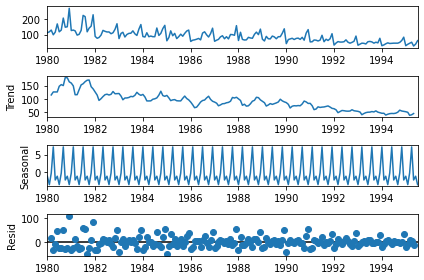

Trend 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01    114.8
1980-04-01    126.0
1980-05-01    126.0
1980-06-01    126.0
1980-07-01    147.2
1980-08-01    153.4
1980-09-01    149.8
1980-10-01    179.6
1980-11-01    179.0
1980-12-01    163.8
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -1.163483
1980-02-01   -3.569039
1980-03-01   -0.260330
1980-04-01    7.236967
1980-05-01   -2.244114
1980-06-01   -1.163483
1980-07-01   -3.569039
1980-08-01   -0.260330
1980-09-01    7.236967
1980-10-01   -2.244114
1980-11-01   -1.163483
1980-12-01   -3.569039
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01     14.460330
1980-04-01    -34.236967
1980-05-01     -7.755886
1980-06-01     43.163483
1980-07-01    -25.630961
1980-08-01    -24.139670
1980-09-01     47.963033
1980-10-01    -30.355886
1980-11-01    -27.836517
1980-12-01    106.769039
Name: resid, dtype: float64 



In [280]:
decompose_rose = seasonal_decompose(rose_df, model='additive', period=5)
ax = decompose_rose.plot()
plt.show()

trend = decompose_rose.trend
seasonality = decompose_rose.seasonal
residual = decompose_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Multiplicative decomposition of Sparkling data

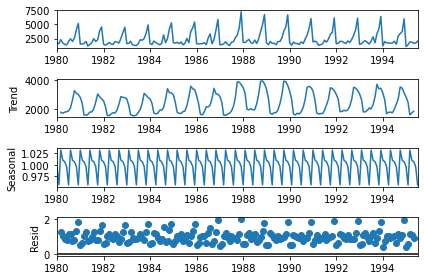

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01    1752.8
1980-04-01    1691.0
1980-05-01    1766.0
1980-06-01    1795.8
1980-07-01    1850.2
1980-08-01    2075.2
1980-09-01    2617.2
1980-10-01    3259.8
1980-11-01    3075.2
1980-12-01    2983.0
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.995970
1980-02-01    0.956678
1980-03-01    1.031308
1980-04-01    1.009669
1980-05-01    1.006375
1980-06-01    0.995970
1980-07-01    0.956678
1980-08-01    1.031308
1980-09-01    1.009669
1980-10-01    1.006375
1980-11-01    0.995970
1980-12-01    0.956678
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01    1.274564
1980-04-01    1.002724
1980-05-01    0.827679
1980-06-01    0.769892
1980-07-01    1.110706
1980-08-01    1.146170
1980-09-01    0.750803
1980-10-01    0.791323
1980-11-01    1.334397
1980-12-01    1.814792
Name: resid, dtype: float64 



In [281]:
#Multiplicative decompose
decompose_sparkling = seasonal_decompose(sparkling_df, model='multiplicative', period=5)
ax = decompose_sparkling.plot()
plt.show()

trend = decompose_sparkling.trend
seasonality = decompose_sparkling.seasonal
residual = decompose_sparkling.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Multiplicative decomposition of Rose data

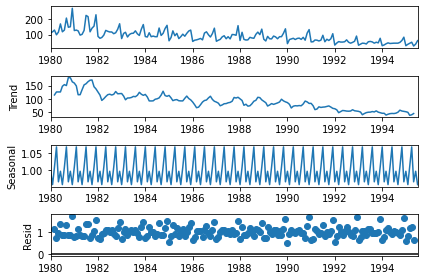

Trend 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01    114.8
1980-04-01    126.0
1980-05-01    126.0
1980-06-01    126.0
1980-07-01    147.2
1980-08-01    153.4
1980-09-01    149.8
1980-10-01    179.6
1980-11-01    179.0
1980-12-01    163.8
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.997278
1980-02-01    0.958456
1980-03-01    1.009386
1980-04-01    1.068252
1980-05-01    0.966627
1980-06-01    0.997278
1980-07-01    0.958456
1980-08-01    1.009386
1980-09-01    1.068252
1980-10-01    0.966627
1980-11-01    0.997278
1980-12-01    0.958456
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01    1.113244
1980-04-01    0.735514
1980-05-01    0.952420
1980-06-01    1.336972
1980-07-01    0.836377
1980-08-01    0.833119
1980-09-01    1.281057
1980-10-01    0.846744
1980-11-01    0.840276
1980-12-01    1.700690
Name: resid, dtype: float64 



In [282]:
decompose_rose = seasonal_decompose(rose_df, model='multiplicative', period=5)
ax = decompose_rose.plot()
plt.show()

trend = decompose_rose.trend
seasonality = decompose_rose.seasonal
residual = decompose_rose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')


# 3.Split the data into training and test. The test data should start in 1991

In [283]:
train_sparkling = sparkling_df1[sparkling_df1['Year'] < 1991]
test_sparkling = sparkling_df1[sparkling_df1['Year'] > 1990]

display(train_sparkling.tail())
print("Train Data:",train_sparkling.shape)
display(test_sparkling.head())
print("Test Data:", test_sparkling.shape)

,Sparkling,Year,Month
YearMonth,,,
1990-08-01,1605,1990,8
1990-09-01,2424,1990,9
1990-10-01,3116,1990,10
1990-11-01,4286,1990,11
1990-12-01,6047,1990,12


Train Data: (132, 3)


,Sparkling,Year,Month
YearMonth,,,
1991-01-01,1902,1991,1
1991-02-01,2049,1991,2
1991-03-01,1874,1991,3
1991-04-01,1279,1991,4
1991-05-01,1432,1991,5


Test Data: (55, 3)


In [284]:
train_rose = rose_df1[rose_df1['Year'] < 1991]
test_rose = rose_df1[rose_df1['Year'] > 1990]

display(train_rose.tail())
print("Train Data:", train_rose.shape)
display(test_rose.head())
print("Test Data:", test_rose.shape)

,Rose,Year,Month
YearMonth,,,
1990-08-01,70.0,1990,8
1990-09-01,83.0,1990,9
1990-10-01,65.0,1990,10
1990-11-01,110.0,1990,11
1990-12-01,132.0,1990,12


Train Data: (132, 3)


,Rose,Year,Month
YearMonth,,,
1991-01-01,54.0,1991,1
1991-02-01,55.0,1991,2
1991-03-01,66.0,1991,3
1991-04-01,65.0,1991,4
1991-05-01,60.0,1991,5


Test Data: (55, 3)


# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [285]:
#Sparkling
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

LR_train_sparkling = train_sparkling.copy()
LR_test_sparkling = test_sparkling.copy()

LR_train_sparkling['time'] = train_time
LR_test_sparkling['time'] = test_time

display(LR_train_sparkling.head())
display(LR_test_sparkling.head())

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


,Sparkling,Year,Month,time
YearMonth,,,,
1980-01-01,1686,1980,1,1
1980-02-01,1591,1980,2,2
1980-03-01,2304,1980,3,3
1980-04-01,1712,1980,4,4
1980-05-01,1471,1980,5,5


,Sparkling,Year,Month,time
YearMonth,,,,
1991-01-01,1902,1991,1,133
1991-02-01,2049,1991,2,134
1991-03-01,1874,1991,3,135
1991-04-01,1279,1991,4,136
1991-05-01,1432,1991,5,137


In [286]:
#Rose
train_time1 = [i+1 for i in range(len(train_rose))]  
test_time1 = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

LR_train_rose = train_rose.copy()
LR_test_rose = test_rose.copy()

LR_train_rose['time'] = train_time1
LR_test_rose['time'] = test_time1

display(LR_train_rose.head())
display(LR_test_rose.head())

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


,Rose,Year,Month,time
YearMonth,,,,
1980-01-01,112.0,1980,1,1
1980-02-01,118.0,1980,2,2
1980-03-01,129.0,1980,3,3
1980-04-01,99.0,1980,4,4
1980-05-01,116.0,1980,5,5


,Rose,Year,Month,time
YearMonth,,,,
1991-01-01,54.0,1991,1,133
1991-02-01,55.0,1991,2,134
1991-03-01,66.0,1991,3,135
1991-04-01,65.0,1991,4,136
1991-05-01,60.0,1991,5,137


# Model 1: Linear Regression

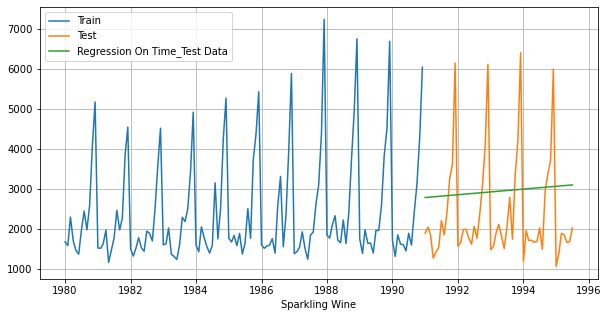

In [287]:
#regression on sparkling
lr_spark = LinearRegression()
lr_spark.fit(LR_train_sparkling[['time']], LR_train_sparkling['Sparkling'])

test_predictions_model1 = lr_spark.predict(LR_test_sparkling[['time']])
LR_test_sparkling['Reg_sparkling'] = test_predictions_model1

plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LR_test_sparkling['Reg_sparkling'], label='Regression On Time_Test Data')
plt.xlabel("Sparkling Wine")
plt.legend(loc='best')
plt.grid();


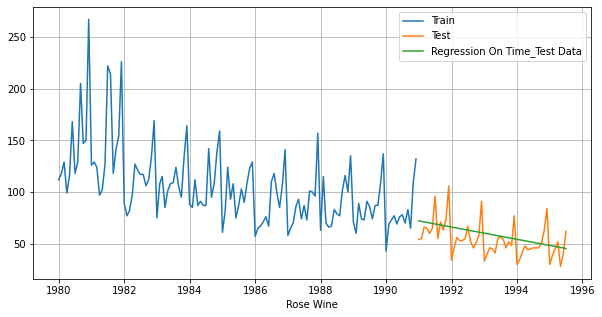

In [288]:
#regression on rose
lr_rose = LinearRegression()
lr_rose.fit(LR_train_rose[['time']], LR_train_rose['Rose'])

test_predictions_model11 = lr_rose.predict(LR_test_rose[['time']])
LR_test_rose['Reg_rose'] = test_predictions_model11

plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LR_test_rose['Reg_rose'], label='Regression On Time_Test Data')
plt.xlabel("Rose Wine")
plt.legend(loc='best')
plt.grid();

In [289]:
#evaluation

rmse_model1_test = metrics.mean_squared_error(LR_test_sparkling['Sparkling'],test_predictions_model1,squared=False)
#print("For RegressionOnTime forecast on the Test Data for Sparkling Wine,  RMSE is %3.3f " %(rmse_model1_test))


rmse_model11_test = metrics.mean_squared_error(LR_test_rose['Rose'],test_predictions_model11,squared=False)
#print("For RegressionOnTime forecast on the Test Data for Rose Wine,  RMSE is %3.3f " %(rmse_model11_test))

Spark_resultsDf = pd.DataFrame({'Test_Spark RMSE': [rmse_model1_test]},index=['Regression'])
Rose_resultsDf = pd.DataFrame({'Test_Rose RMSE': [rmse_model11_test]},index=['Regression'])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175


,Test_Rose RMSE
Regression,15.262509


# Model 2: Naive Approach: ŷ t+1=yt

In [290]:
Naive_train_sparkling = train_sparkling.copy()
Naive_test_sparkling = test_sparkling.copy()

Naive_train_rose = train_rose.copy()
Naive_test_rose = test_rose.copy()

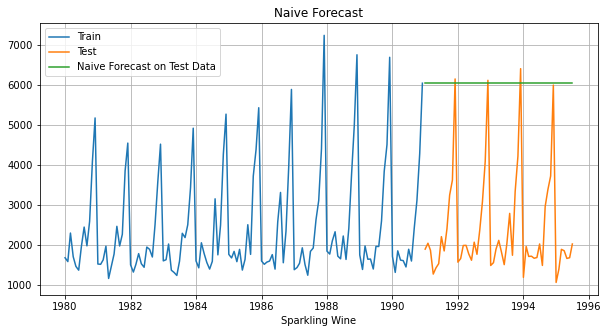

In [291]:
#regression on sparkling
Naive_test_sparkling['naive'] = np.asarray(Naive_train_sparkling['Sparkling'])[len(np.asarray(Naive_train_sparkling['Sparkling']))-1]
#display(Naive_test_sparkling.head())

plt.figure(figsize= (10,5))
plt.plot(Naive_train_sparkling['Sparkling'], label='Train')
plt.plot(Naive_test_sparkling['Sparkling'], label='Test')
plt.plot(Naive_test_sparkling['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Naive Forecast")
plt.grid();

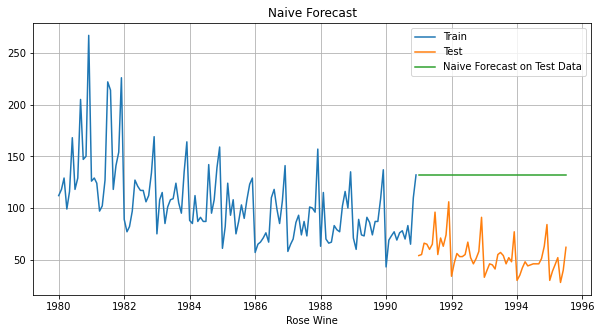

In [292]:
#regression on rose
Naive_test_rose['naive'] = np.asarray(Naive_train_rose['Rose'])[len(np.asarray(Naive_train_rose['Rose']))-1]
#display(Naive_test_rose.head())

plt.figure(figsize= (10,5))
plt.plot(Naive_train_rose['Rose'], label='Train')
plt.plot(Naive_test_rose['Rose'], label='Test')

plt.plot(Naive_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Naive Forecast")
plt.grid();

In [293]:
#evaluation

rmse_model2_test = metrics.mean_squared_error(Naive_test_sparkling['Sparkling'],Naive_test_sparkling['naive'],squared=False)


rmse_model22_test = metrics.mean_squared_error(Naive_test_rose['Rose'],Naive_test_rose['naive'],squared=False)


Spark_resultsDf_2 = pd.DataFrame({'Test_Spark RMSE': [rmse_model2_test]},index=['NaiveModel'])
Rose_resultsDf2 = pd.DataFrame({'Test_Rose RMSE': [rmse_model22_test]},index=['NaiveModel'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf_2])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf2])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093


# Method 3: Simple Average

In [294]:
SimpleAvg_train_sparkling = train_sparkling.copy()
SimpleAvg_test_sparkling = test_sparkling.copy()

SimpleAvg_train_rose = train_rose.copy()
SimpleAvg_test_rose = test_rose.copy()

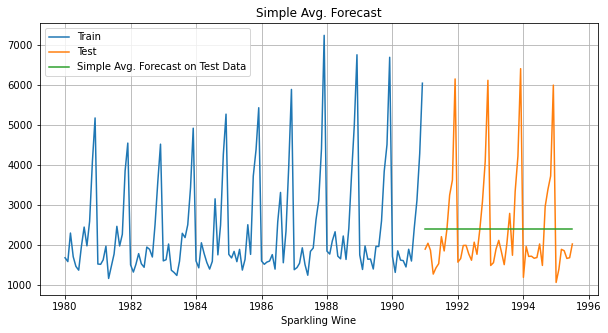

In [295]:
#regression on sparkling
SimpleAvg_test_sparkling['Mean Forecast'] = SimpleAvg_train_sparkling['Sparkling'].mean()

plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAvg_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAvg_test_sparkling['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Simple Avg. Forecast")
plt.grid();

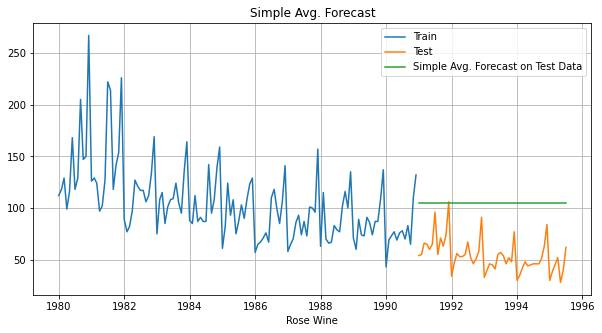

In [296]:
#regression on rose
SimpleAvg_test_rose['Mean Forecast'] = SimpleAvg_train_rose['Rose'].mean()

plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_rose['Rose'], label='Train')
plt.plot(SimpleAvg_test_rose['Rose'], label='Test')
plt.plot(SimpleAvg_test_rose['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Simple Avg. Forecast")
plt.grid();

In [297]:
#evaluation

rmse_model3_test = metrics.mean_squared_error(SimpleAvg_test_sparkling['Sparkling'],SimpleAvg_test_sparkling['Mean Forecast'],squared=False)


rmse_model33_test = metrics.mean_squared_error(SimpleAvg_test_rose['Rose'],SimpleAvg_test_rose['Mean Forecast'],squared=False)


Spark_resultsDf3 = pd.DataFrame({'Test_Spark RMSE': [rmse_model3_test]},index=['SimpleAvg'])
Rose_resultsDf3 = pd.DataFrame({'Test_Rose RMSE': [rmse_model33_test]},index=['SimpleAvg'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf3])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf3])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the minimum error.

In [298]:
MA_sparkling = sparkling_df1.copy()
MA_sparkling['Trailing_2'] = MA_sparkling['Sparkling'].rolling(2).mean()
MA_sparkling['Trailing_4'] = MA_sparkling['Sparkling'].rolling(4).mean()
MA_sparkling['Trailing_6'] = MA_sparkling['Sparkling'].rolling(6).mean()
MA_sparkling['Trailing_9'] = MA_sparkling['Sparkling'].rolling(9).mean()

MA_sparkling.head(10)

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1980,6,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1980,7,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,1980,8,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,1980,9,2218.5,1945.00,1827.166667,1838.222222


In [299]:
MA_rose = rose_df1.copy()
MA_rose['Trailing_2'] = MA_rose['Rose'].rolling(2).mean()
MA_rose['Trailing_4'] = MA_rose['Rose'].rolling(4).mean()
MA_rose['Trailing_6'] = MA_rose['Rose'].rolling(6).mean()
MA_rose['Trailing_9'] = MA_rose['Rose'].rolling(9).mean()

MA_rose.head(10)

,Rose,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,112.0,1980,1,NaN,NaN,NaN,NaN
1980-02-01,118.0,1980,2,115.0,NaN,NaN,NaN
1980-03-01,129.0,1980,3,123.5,NaN,NaN,NaN
1980-04-01,99.0,1980,4,114.0,114.50,NaN,NaN
1980-05-01,116.0,1980,5,107.5,115.50,NaN,NaN
1980-06-01,168.0,1980,6,142.0,128.00,123.666667,NaN
1980-07-01,118.0,1980,7,143.0,125.25,124.666667,NaN
1980-08-01,129.0,1980,8,123.5,132.75,126.500000,NaN
1980-09-01,205.0,1980,9,167.0,155.00,139.166667,132.666667


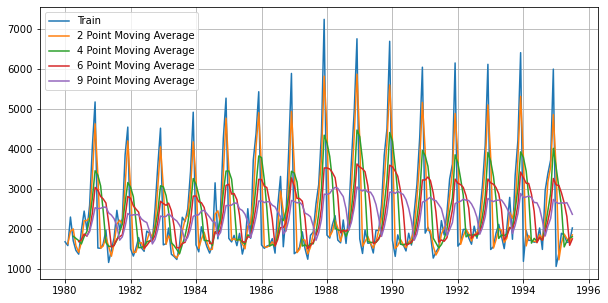

In [300]:
## Plotting on the whole Sparkling wine data

plt.figure(figsize= (10,5))
plt.plot(MA_sparkling['Sparkling'], label='Train')
plt.plot(MA_sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_sparkling['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MA_sparkling['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

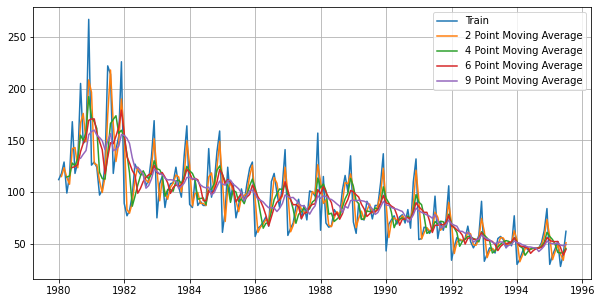

In [301]:
## Plotting on the whole Rose wine data

plt.figure(figsize= (10,5))
plt.plot(MA_rose['Rose'], label='Train')
plt.plot(MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_rose['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MA_rose['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

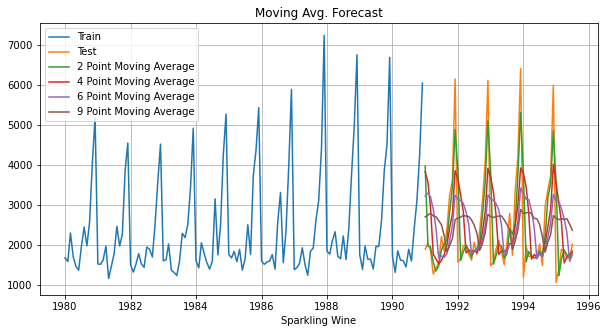

In [302]:
train_MA_spark = MA_sparkling[MA_sparkling['Year'] < 1991]
test_MA_spark = MA_sparkling[MA_sparkling['Year'] > 1990]

plt.figure(figsize= (10,5))
plt.plot(train_MA_spark['Sparkling'], label='Train')
plt.plot(test_MA_spark['Sparkling'], label='Test')
plt.plot(test_MA_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_spark['Trailing_6'], label ='6 Point Moving Average')
plt.plot(test_MA_spark['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Sparkling Wine")
plt.title("Moving Avg. Forecast")
plt.grid();

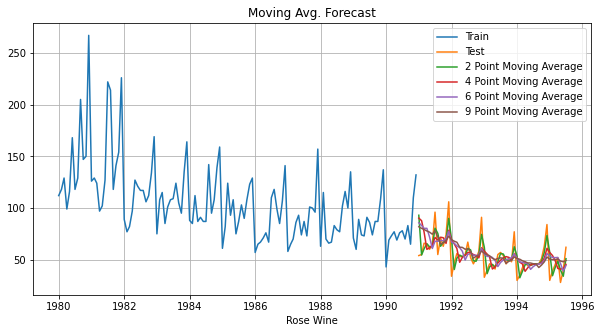

In [303]:
train_MA_rose = MA_rose[MA_rose['Year'] < 1991]
test_MA_rose = MA_rose[MA_rose['Year'] > 1990]

plt.figure(figsize= (10,5))
plt.plot(train_MA_rose['Rose'], label='Train')
plt.plot(test_MA_rose['Rose'], label='Test')
plt.plot(test_MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_rose['Trailing_6'], label ='6 Point Moving Average')
plt.plot(test_MA_rose['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Rose Wine")
plt.title("Moving Avg. Forecast")
plt.grid();

In [304]:
rmse_model4_test_2 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_2'],squared=False)
rmse_model4_test_4 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_4'],squared=False)
rmse_model4_test_6 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_6'],squared=False)
rmse_model4_test_9 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_9'],squared=False)



rmse_model44_test_2 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_2'],squared=False)
rmse_model44_test_4 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_4'],squared=False)
rmse_model44_test_6 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_6'],squared=False)
rmse_model44_test_9 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_9'],squared=False)


Spark_resultsDf4 = pd.DataFrame({'Test_Spark RMSE': [rmse_model4_test_2,rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                                index=['MovingAvg2','MovingAvg4', 'MovingAvg6', 'MovingAvg9' ])
Rose_resultsDf4 = pd.DataFrame({'Test_Rose RMSE': [rmse_model44_test_2,rmse_model44_test_4, rmse_model44_test_6, rmse_model44_test_9]},
                                index=['MovingAvg2','MovingAvg4', 'MovingAvg6', 'MovingAvg9'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf4])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf4])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503


# Exponential Smoothing methods

Exponential smoothing methods consist of flattening time series data. Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations

# Simple Exponential Smoothing (SES)

In [305]:
SES_train_sparkling = train_sparkling.copy()   #SES model
SES_test_sparkling = test_sparkling.copy()

SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [306]:
model_SES_spark = SimpleExpSmoothing(SES_train_sparkling['Sparkling'])
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)
display(model_SES_autofit_spark.params)

SES_predict_spark = model_SES_autofit_spark.forecast(steps=len(SES_test_sparkling))


model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)
display(model_SES_autofit_rose.params)

SES_predict_rose = model_SES_autofit_rose.forecast(steps=len(SES_test_rose))

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.09874985002628338,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38726392126804,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Text(0.5, 1.0, 'Alpha = 0.0 Predictions')

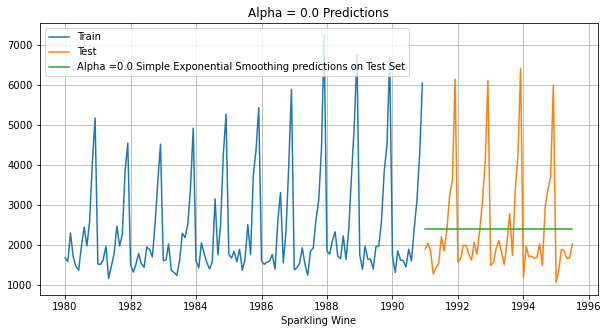

In [307]:
plt.figure(figsize= (10,5))
plt.plot(SES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(SES_test_sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.grid()
plt.title('Alpha = 0.0 Predictions')

Text(0.5, 1.0, 'Alpha = 0.09 Predictions')

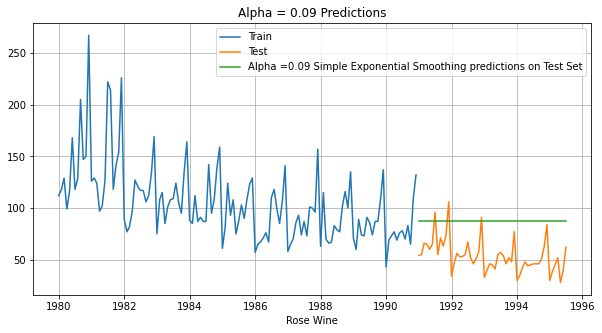

In [308]:
plt.figure(figsize= (10,5))
plt.plot(SES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.grid()
plt.title('Alpha = 0.09 Predictions')

In [309]:
#evaluation

rmse_model5_test = metrics.mean_squared_error(SES_predict_spark, SES_test_sparkling['Sparkling'],squared=False)


rmse_model55_test = metrics.mean_squared_error(SES_predict_rose, SES_test_rose['Rose'],squared=False)


Spark_resultsDf5 = pd.DataFrame({'Test_Spark RMSE': [rmse_model5_test]},index=['SES'])
Rose_resultsDf5 = pd.DataFrame({'Test_Rose RMSE': [rmse_model55_test]},index=['SES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf5])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf5])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787


# Double Exponential Smoothing

In [310]:
#DES model
DES_train_sparkling = train_sparkling.copy()   
DES_test_sparkling = test_sparkling.copy()

DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [311]:

model_DES_spark = Holt(DES_train_sparkling['Sparkling'])
model_DES_autofit_spark = model_DES_spark.fit(optimized=True)
display(model_DES_autofit_spark.params)

DES_predict_spark = model_DES_autofit_spark.forecast(steps=len(DES_test_sparkling))


model_DES_rose = Holt(DES_train_rose['Rose'])
model_DES_autofit_rose = model_DES_rose.fit(optimized=True)
display(model_DES_autofit_rose.params)

DES_predict_rose = model_DES_autofit_rose.forecast(steps=len(DES_test_rose))

{'smoothing_level': 0.6477793434322846,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.083818806434,
 'initial_slope': 27.072937320155905,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

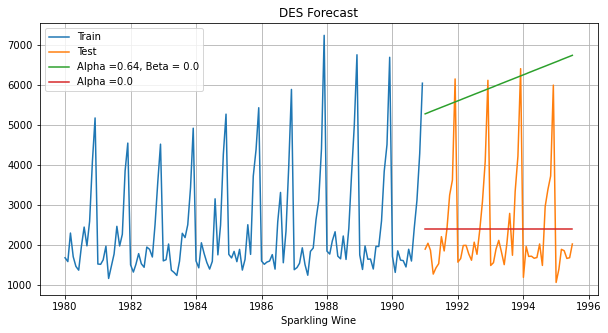

In [312]:
plt.figure(figsize= (10,5))
plt.plot(DES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(DES_test_sparkling['Sparkling'], label='Test')
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("DES Forecast")
plt.grid()

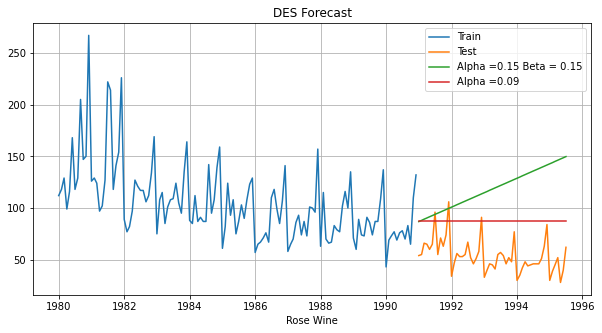

In [313]:
plt.figure(figsize= (10,5))
plt.plot(DES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(DES_test_rose['Rose'], label='Test')
plt.plot(DES_predict_rose, label='Alpha =0.15 Beta = 0.15')
plt.plot(SES_predict_rose, label='Alpha =0.09')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("DES Forecast")
plt.grid()

In [314]:
#evaluation

rmse_model6_test = metrics.mean_squared_error(DES_predict_spark, DES_test_sparkling['Sparkling'],squared=False)


rmse_model66_test = metrics.mean_squared_error(DES_predict_rose, DES_test_rose['Rose'],squared=False)


Spark_resultsDf6 = pd.DataFrame({'Test_Spark RMSE': [rmse_model6_test]},index=['DES'])
Rose_resultsDf66 = pd.DataFrame({'Test_Rose RMSE': [rmse_model66_test]},index=['DES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf6])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf66])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839
DES,3851.331290


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787
DES,70.549148


# Triple Exponential Smoothing

In [315]:
#TES model
TES_train_sparkling = train_sparkling.copy()   
TES_test_sparkling = test_sparkling.copy()

TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [316]:
model_TES_spark = ExponentialSmoothing(TES_train_sparkling['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark = model_TES_spark.fit(optimized=True)
display(model_TES_autofit_spark.params)

TES_predict_spark = model_TES_autofit_spark.forecast(steps=len(TES_test_sparkling))


model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'], trend='additive', seasonal= 'multiplicative')
model_TES_autofit_rose = model_TES_rose.fit(optimized=True)
display(model_TES_autofit_rose.params)

TES_predict_rose = model_TES_autofit_rose.forecast(steps=len(TES_test_rose))

{'smoothing_level': 0.08620807620652111,
 'smoothing_slope': 2.5318127264805285e-10,
 'smoothing_seasonal': 0.4763318881970767,
 'damping_slope': nan,
 'initial_level': 1684.856831619659,
 'initial_slope': 0.006547258914785458,
 'initial_seasons': array([  39.18349969,  -37.78583681,  464.67331107,  206.1306033 ,
        -141.07452355, -157.23487797,  338.09368962,  856.86721657,
         403.58906901,  971.28204491, 2401.59300214, 3426.63695382]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.10609630896598816,
 'smoothing_slope': 0.048438506611339596,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565108239777,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550257, 1.65927135, 1.80572621, 1.58888812, 1.77822689,
        1.92604353, 2.11649443, 2.25135182, 2.11690561, 2.08112817,
        2.4092726 , 3.30448096]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

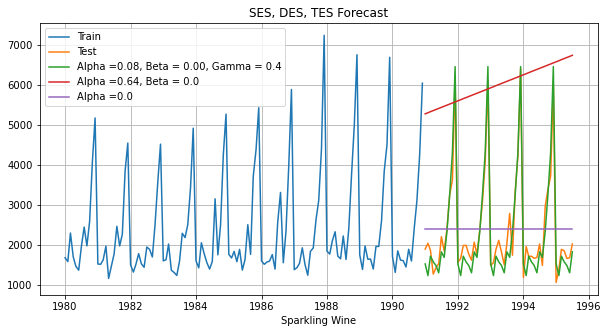

In [317]:
plt.figure(figsize= (10,5))
plt.plot(TES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(TES_test_sparkling['Sparkling'], label='Test')
plt.plot(TES_predict_spark, label='Alpha =0.08, Beta = 0.00, Gamma = 0.4' )
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')


plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

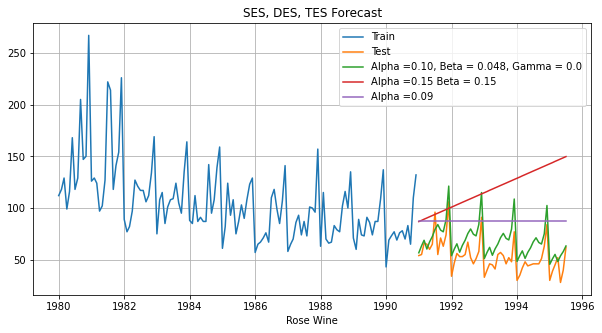

In [318]:
plt.figure(figsize= (10,5))
plt.plot(TES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(TES_test_rose['Rose'], label='Test')
plt.plot(TES_predict_rose, label='Alpha =0.10, Beta = 0.048, Gamma = 0.0' )
plt.plot(DES_predict_rose, label='Alpha =0.15 Beta = 0.15')
plt.plot(SES_predict_rose, label='Alpha =0.09')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

In [319]:
#evaluation

rmse_model0_test = metrics.mean_squared_error(TES_predict_spark, TES_test_sparkling['Sparkling'],squared=False)
rmse_model00_test = metrics.mean_squared_error(TES_predict_rose, TES_test_rose['Rose'],squared=False)

Spark_resultsDf0 = pd.DataFrame({'Test_Spark RMSE': [rmse_model0_test]},index=['TES'])
Rose_resultsDf00 = pd.DataFrame({'Test_Rose RMSE': [rmse_model00_test]},index=['TES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf0])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf00])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839
DES,3851.331290
TES,362.719971


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787
DES,70.549148
TES,17.345537


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [320]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sparkling_df)

print('DF test statistic for Sparkling dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

dftest = adfuller(rose_df)

print('DF test statistic for Rose dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic for Sparkling dataset -1.360
DF test p-value is 0.6011
DF test statistic for Rose dataset -1.877
DF test p-value is 0.3427


since the, Null Hypothesis H0 : The series is non stationary Alternate Hypothesis H1: The series is stationary

we cannot reject the null as the p values for both of series is greater than 0.05 (significance level) from the Augmented Dickey Fuller test above

In [321]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Sparkling Train$Test:



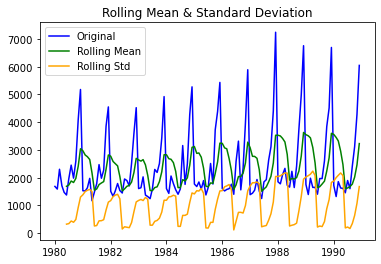

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



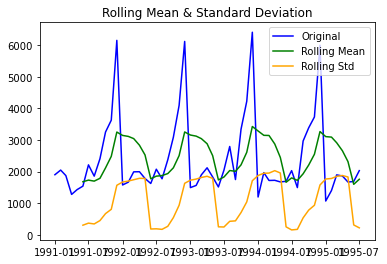

Results of Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [322]:
print("Sparkling Train$Test:\n")
ax = test_stationarity(train_sparkling['Sparkling'])
ax1 = test_stationarity(test_sparkling['Sparkling'])

Rose Train$Test:



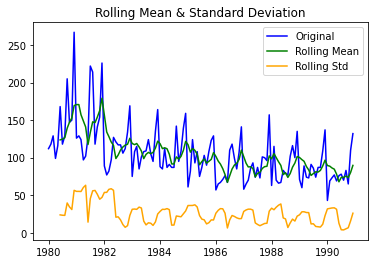

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



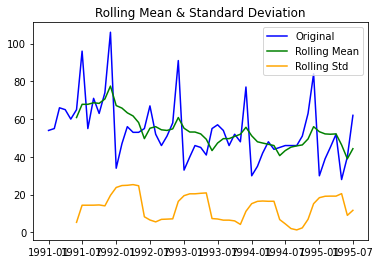

Results of Dickey-Fuller Test:
Test Statistic                 -4.464772
p-value                         0.000228
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [323]:
print("Rose Train$Test:\n")
ax = test_stationarity(train_rose['Rose'])
ax1 = test_stationarity(test_rose['Rose'])

Differenced Sparkling Data:



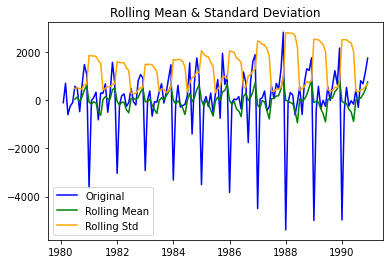

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



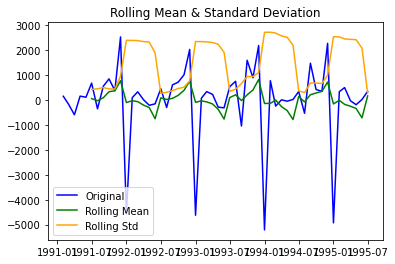

Results of Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [324]:
print("Differenced Sparkling Data:\n")
ax = test_stationarity((train_sparkling['Sparkling']).diff().dropna())
ax1 = test_stationarity((test_sparkling['Sparkling']).diff().dropna())

Differenced Rose Data:



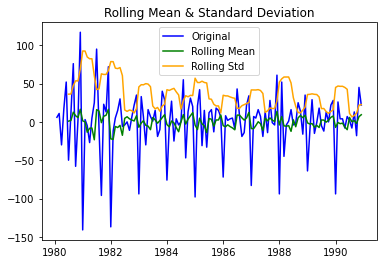

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



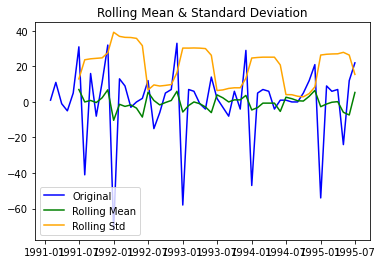

Results of Dickey-Fuller Test:
Test Statistic                 -2.794400
p-value                         0.059078
#Lags Used                     11.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64 



In [325]:
print("Differenced Rose Data:\n")
ax = test_stationarity((train_rose['Rose']).diff().dropna())
ax1 = test_stationarity((test_rose['Rose']).diff().dropna())

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [326]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [327]:
# Creating an empty Dataframe with column names only  
ARIMA_AIC_sp = pd.DataFrame(columns=['param', 'AIC_Sparkling'])
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_s = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()  #Sparkling dataset
    #print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_sp = ARIMA_AIC_sp.append({'param':param, 'AIC_Sparkling': ARIMA_model_s.aic}, ignore_index=True)
    
display(ARIMA_AIC_sp.sort_values(by='AIC_Sparkling',ascending=True))

,param,AIC_Sparkling
8,"(2, 1, 2)",2210.623720
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [328]:
# Creating an empty Dataframe with column names only  
ARIMA_AIC_ro = pd.DataFrame(columns=['param', 'AIC_Rose'])
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_r = ARIMA(train_rose['Rose'].values,order=param).fit()  #Sparkling dataset
    #print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_ro = ARIMA_AIC_ro.append({'param':param, 'AIC_Rose': ARIMA_model_r.aic}, ignore_index=True)
    
display(ARIMA_AIC_ro.sort_values(by='AIC_Rose',ascending=True))

,param,AIC_Rose
2,"(0, 1, 2)",1276.835372
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [329]:
auto_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(2,1,2))

results_auto_ARIMA_s = auto_ARIMA_s.fit()

print("Sparkling Data:\n", results_auto_ARIMA_s.summary())

Sparkling Data:
                              ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.312
Method:                       css-mle   S.D. of innovations           1013.589
Date:                Sun, 23 May 2021   AIC                           2210.624
Time:                        23:04:02   BIC                           2227.875
Sample:                    02-01-1980   HQIC                          2217.634
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5845      0.519     10.767      0.000       4.568       6.601
ar.L1.D.Sparkling     1.2699      0.075     17.041      0.000       1.124       1.416
ar.L2.D

In [330]:
auto_ARIMA_r = ARIMA((train_rose['Rose']).diff().dropna(), order=(0,1,2))

results_auto_ARIMA_r = auto_ARIMA_r.fit()

print("Rose Data:\n", results_auto_ARIMA_r.summary())

Rose Data:
                              ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  130
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.749
Method:                       css-mle   S.D. of innovations             30.399
Date:                Sun, 23 May 2021   AIC                           1281.497
Time:                        23:04:02   BIC                           1292.967
Sample:                    03-01-1980   HQIC                          1286.158
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0091      0.005      2.010      0.044       0.000       0.018
ma.L1.D.Rose    -1.9983      0.038    -51.949      0.000      -2.074      -1.923
ma.L2.D.Rose     0.9983      0.0

In [331]:

predicted_auto_ARIMA_s = results_auto_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_auto_ARIMA_r = results_auto_ARIMA_r.forecast(steps=len(test_rose))



rmse_model7_test = metrics.mean_squared_error(predicted_auto_ARIMA_s[0], test_sparkling['Sparkling'],squared=False)


rmse_model77_test = metrics.mean_squared_error(predicted_auto_ARIMA_r[0], test_rose['Rose'],squared=False)


Spark_resultsDf7 = pd.DataFrame({'Test_Spark RMSE': [rmse_model7_test]},index=[' Auto ARIMA (2,1,2)'])
Rose_resultsDf77 = pd.DataFrame({'Test_Rose RMSE': [rmse_model77_test]},index=['Auto ARIMA (0,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf7])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf77])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839
DES,3851.331290
TES,362.719971


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787
DES,70.549148
TES,17.345537


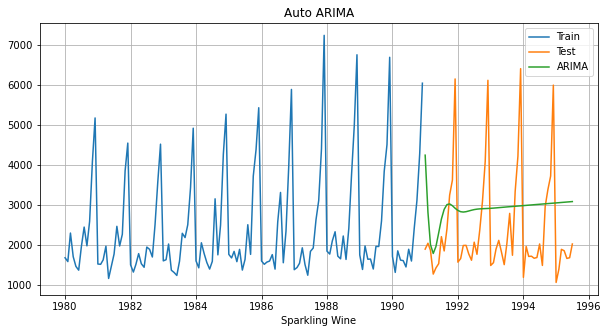

In [332]:
pred_ARIMA = pd.DataFrame({'Pred': predicted_auto_ARIMA_s[0]}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Auto ARIMA")
plt.grid()

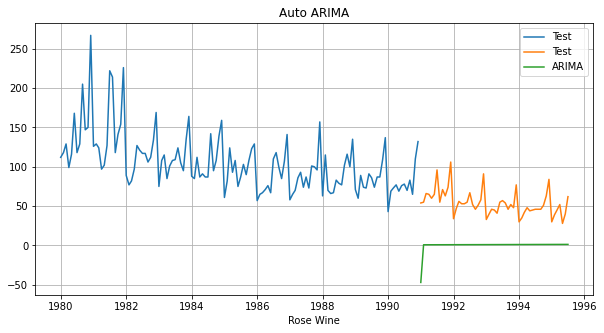

In [333]:
pred_ARIMA_Rose = pd.DataFrame({'Pred': predicted_auto_ARIMA_r[0]}, index = test_rose.index)
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Test') #sparkling data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Auto ARIMA")
plt.grid()

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

# ARIMA

<Figure size 1296x360 with 0 Axes>

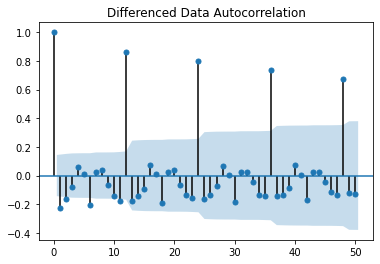

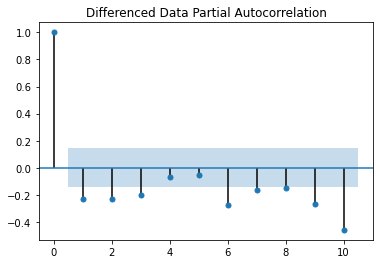

In [334]:
plt.figure(figsize= (18,5))
plot_acf(sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkling_df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

<Figure size 1296x360 with 0 Axes>

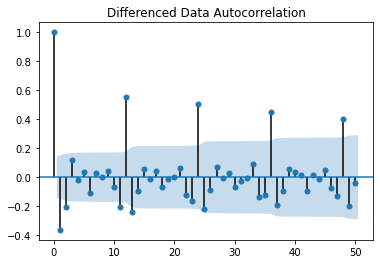

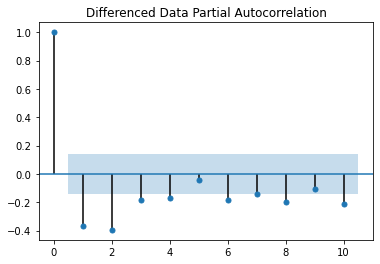

In [335]:
plt.figure(figsize= (18,5))
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose_df['Rose'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots for Sparkling data, we can say that both the PACF cuts off at 3 and ACF plot cuts-off at lag 2.

By looking at the above plots for Rose data, we can say that PACF cuts off at 4 and ACF plot cuts-off at lag 2.

In [336]:
manual_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(3,1,2))

results_manual_ARIMA_s = manual_ARIMA_s.fit()

print("Sparkling Data:\n", results_manual_ARIMA_s.summary())

Sparkling Data:
                              ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.214
Date:                Sun, 23 May 2021   AIC                           2228.928
Time:                        23:04:04   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9847      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4419   1.06e-05  -4.17e+04      0.000      -0.442      -0.442
ar.L2.D

In [337]:
manual_ARIMA_r = ARIMA(train_rose['Rose'], order=(4,1,2))

results_manual_ARIMA_r = manual_ARIMA_r.fit()

print("Rose:\n", results_manual_ARIMA_r.summary())

Rose:
                              ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Sun, 23 May 2021   AIC                           1283.753
Time:                        23:04:04   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132   

In [338]:
predicted_manual_ARIMA_s = results_manual_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_manual_ARIMA_r = results_manual_ARIMA_r.forecast(steps=len(test_rose))


#rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
#print(rmse)

rmse_model8_test = metrics.mean_squared_error(predicted_manual_ARIMA_s[0], test_sparkling['Sparkling'],squared=False)


rmse_model88_test = metrics.mean_squared_error(predicted_manual_ARIMA_r[0], test_rose['Rose'],squared=False)


Spark_resultsDf8 = pd.DataFrame({'Test_Spark RMSE': [rmse_model8_test]},index=['Manual ARIMA (3,1,2)'])
Rose_resultsDf88 = pd.DataFrame({'Test_Rose RMSE': [rmse_model88_test]},index=['Manual ARIMA (4,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf8])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf88])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839
DES,3851.331290
TES,362.719971


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787
DES,70.549148
TES,17.345537


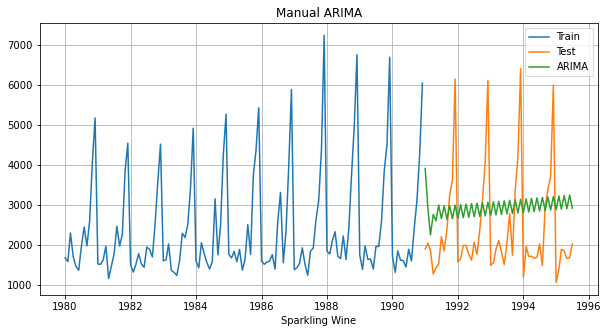

In [339]:
pred_ARIMA_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_s[0]}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA_manual, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Manual ARIMA")
plt.grid()

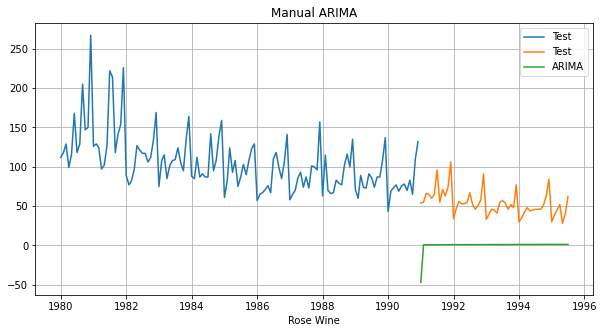

In [340]:
pred_ARIMA_Rose_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_r[0]}, index = test_rose.index)
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Test') #sparkling data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Manual ARIMA")
plt.grid()

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [341]:
display(Spark_resultsDf)
display(Rose_resultsDf)


,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1275.081839
DES,3851.331290
TES,362.719971


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775787
DES,70.549148
TES,17.345537


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

For Sparkling dataset we see that Triple Exponential smoothing gives the best forecast, so we will move forward with that for forecasting

In [342]:
model_TES_spark_fulldata = ExponentialSmoothing(sparkling_df['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark_fulldata = model_TES_spark_fulldata.fit(optimized=True)
display(model_TES_autofit_spark_fulldata.params)

TES_predict_spark_fulldata = model_TES_autofit_spark_fulldata.forecast(steps=12)

{'smoothing_level': 0.05263157894736842,
 'smoothing_slope': 0.05263157894736842,
 'smoothing_seasonal': 0.3684210526315789,
 'damping_slope': nan,
 'initial_level': 1580.0,
 'initial_slope': 0.01,
 'initial_seasons': array([ 106.,   11.,  724.,  132., -109., -203.,  386.,  873.,  404.,
        1016., 2507., 3599.]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [343]:
#TES_predict_spark_fulldata
Sparkling_forecast = pd.DataFrame({'Sparkling Forecast': TES_predict_spark_fulldata})
date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Sparkling_forecast['Time'] = date
Sparkling_forecast.set_index('Time',inplace=True)


std = Sparkling_forecast['Sparkling Forecast'].std()
se = (1.96*std)/np.sqrt(len(Sparkling_forecast))


Sparkling_forecast['lower CI']= Sparkling_forecast['Sparkling Forecast'] - se
Sparkling_forecast['upper CI']= Sparkling_forecast['Sparkling Forecast'] + se
Sparkling_forecast

,Sparkling Forecast,lower CI,upper CI
Time,,,
1995-08-31,1884.976769,1098.923918,2671.029620
1995-09-30,2402.258496,1616.205645,3188.311348
1995-10-31,3245.977232,2459.924381,4032.030084
1995-11-30,3932.213204,3146.160352,4718.266055
1995-12-31,6119.724082,5333.671230,6905.776933
1996-01-31,1266.116913,480.064062,2052.169764
1996-02-29,1583.646638,797.593787,2369.699490
1996-03-31,1821.829048,1035.776197,2607.881900
1996-04-30,1795.729426,1009.676575,2581.782277


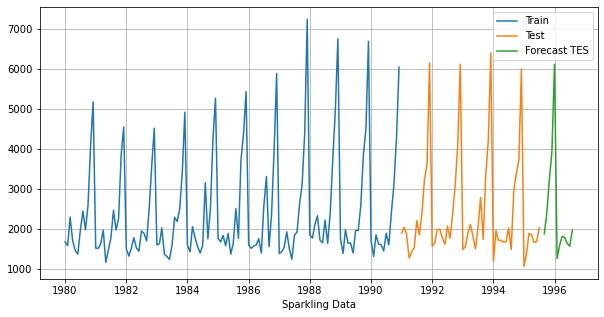

In [344]:
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(Sparkling_forecast['Sparkling Forecast'], label='Forecast TES')

plt.legend(loc='best')
plt.xlabel('Sparkling Data')
plt.grid()

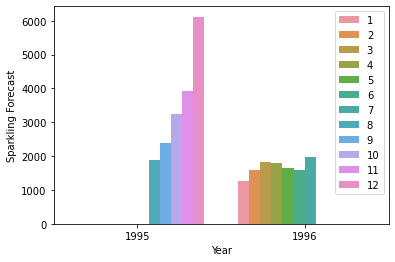

In [345]:
Sparkling_forecast['Year'] = Sparkling_forecast.index.year
Sparkling_forecast['Month'] = Sparkling_forecast.index.month

sns.barplot(x = Sparkling_forecast['Year'], y = Sparkling_forecast['Sparkling Forecast'], hue= Sparkling_forecast['Month'])
plt.legend(loc = 'upper right')
plt.show()

In [346]:
manual_SARIMA_fullrosedata = sm.tsa.statespace.SARIMAX(rose_df['Rose'].values,
                                            order=(4,1,2),
                                            seasonal_order=(3,0,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_manual_fullrosedata = manual_SARIMA_fullrosedata.fit(maxiter=1000)
        

#print(results_manual_SARIMA_fullrosedata.summary()) 

predicted_manual_SARIMA_fullrosedata = results_manual_fullrosedata.get_forecast(steps=12)
Rose_forecast1 = predicted_manual_SARIMA_fullrosedata.summary_frame(alpha=0.05)



date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Rose_forecast1['Time'] = date 
Rose_forecast1.set_index('Time',inplace=True)
Rose_forecast1

y,mean,mean_se,mean_ci_lower,mean_ci_upper
Time,,,,
1995-08-31,46.412203,11.969608,22.952203,69.872203
1995-09-30,48.790729,12.040279,25.192215,72.389242
1995-10-31,47.507883,12.108770,23.775131,71.240635
1995-11-30,56.268161,12.121389,32.510675,80.025648
1995-12-31,77.865945,12.121866,54.107525,101.624365
1996-01-31,28.705557,12.214734,4.765119,52.645995
1996-02-29,37.188429,12.374990,12.933894,61.442964
1996-03-31,42.400073,12.561983,17.779038,67.021107
1996-04-30,40.940984,12.728262,15.994049,65.887919


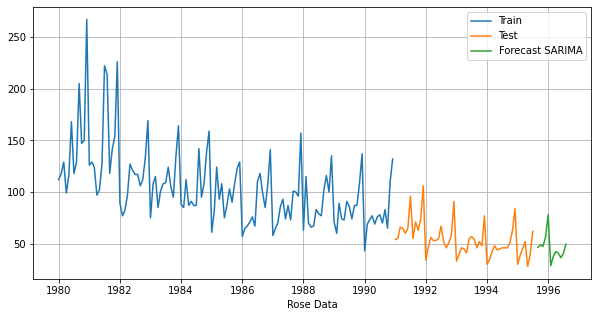

In [347]:
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Train') #rose data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(Rose_forecast1['mean'], label='Forecast SARIMA')

plt.legend(loc='best')
plt.xlabel('Rose Data')
plt.grid()

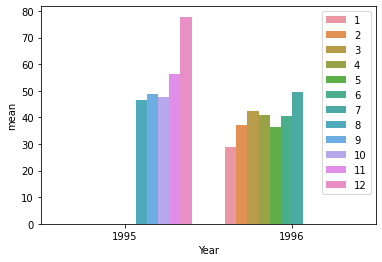

In [348]:
Rose_forecast1['Year'] = Rose_forecast1.index.year
Rose_forecast1['Month'] = Rose_forecast1.index.month

sns.barplot(x = Rose_forecast1['Year'], y = Rose_forecast1['mean'], hue= Rose_forecast1['Month'])
plt.legend(loc = 'upper right')
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Please see Business report 